# Analyzing Credit Card Defaults for Taiwan clients

## 1. Experiment Objective

I will be working on a dataset found on the UCI Machine Learning Repository. This dataset has information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan from April 2005 to September 2005. I choose to analyze this dataset because I was interested in finding what signs there is to predict borrower from defaulting a month in advance. If that can be predicted accurately, lenders could decrease the avaliable limit or possibly close the account before it's used more.

The UCI Machine Learning Repository a web created by a graduate student and it is a collection of datasets that are used by the data science community for education purpose. There is no authentication required to access the datasets and are okay to be used for practice purposes.  

The provided definations of the features are as follow: 

- ID: ID of each client
- LIMIT_BAL: Amount of given credit in NT dollars
- SEX: Gender (1=male, 2=female)
- EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
- MARRIAGE: Marital status (1=married, 2=single, 3=others)
- AGE: Age in years
- PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)
- PAY_2: Repayment status in August, 2005 (scale same as above)
- PAY_3: Repayment status in July, 2005 (scale same as above)
- PAY_4: Repayment status in June, 2005 (scale same as above)
- PAY_5: Repayment status in May, 2005 (scale same as above)
- PAY_6: Repayment status in April, 2005 (scale same as above)
- BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
- BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
- BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
- BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
- BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
- BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
- PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
- PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
- PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
- PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
- PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
- PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
- Default: Default payment (1=yes, 0=no)



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
%matplotlib inline

## 2.  Data collection

In [2]:
file = "default.xls"
df = pd.read_excel(file, header=1, index_col=0)
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [3]:
# check for data type and shape of the data 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   LIMIT_BAL                   30000 non-null  int64
 1   SEX                         30000 non-null  int64
 2   EDUCATION                   30000 non-null  int64
 3   MARRIAGE                    30000 non-null  int64
 4   AGE                         30000 non-null  int64
 5   PAY_0                       30000 non-null  int64
 6   PAY_2                       30000 non-null  int64
 7   PAY_3                       30000 non-null  int64
 8   PAY_4                       30000 non-null  int64
 9   PAY_5                       30000 non-null  int64
 10  PAY_6                       30000 non-null  int64
 11  BILL_AMT1                   30000 non-null  int64
 12  BILL_AMT2                   30000 non-null  int64
 13  BILL_AMT3                   30000 non-null  int64
 14  BILL_A

The dataset contains 24 columns and 30,000 examples. All though the type of data for all columns are labeled integer, we can see we are working with some catagorical data that has been encoded to integer type. 

Before I move on to exploring and cleaning the dataset, I will start by cleaning the column names to make it easier to work with. 

## Clean Feature Names 

In [4]:
print(df.columns)

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')


Changes to make based on initial observations:

- change the label name to make it shorter 
- change the first feature name to describe the data more
- convert all feature names to lower case 



In [5]:
# clean column names to make it easy to work with 
def clean_cols(col):
    col = col.strip() # remove any white spaces 
    col = col.replace("default payment next month", "default")
    col = col.replace('LIMIT_BAL', 'approved_bal')
    col = col.lower()
    return col 


new_cols = []
for col in df.columns:
    clean_col = clean_cols(col)
    new_cols.append(clean_col)
    
df.columns = new_cols
print(df.columns)

Index(['approved_bal', 'sex', 'education', 'marriage', 'age', 'pay_0', 'pay_2',
       'pay_3', 'pay_4', 'pay_5', 'pay_6', 'bill_amt1', 'bill_amt2',
       'bill_amt3', 'bill_amt4', 'bill_amt5', 'bill_amt6', 'pay_amt1',
       'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6', 'default'],
      dtype='object')


## 3. Initial Data Exploration and Data Preprocessing

I will start by exploring the data to have a better understanding at what I am working with and if there is any features that is irrelevant to my problem. After removing the irrelevant features, I will start cleaning the dataset.  

In [6]:
# check some statistical values for all columns
df.describe(include="all")

,approved_bal,sex,education,marriage,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [7]:
# value counts for all features 
column_names = df.columns.tolist()


for column in column_names:
    print(column)
    print(df[column].value_counts(dropna=False))

approved_bal
50000      3365
20000      1976
30000      1610
80000      1567
200000     1528
           ... 
800000        2
760000        1
690000        1
1000000       1
327680        1
Name: approved_bal, Length: 81, dtype: int64
sex
2    18112
1    11888
Name: sex, dtype: int64
education
2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: education, dtype: int64
marriage
2    15964
1    13659
3      323
0       54
Name: marriage, dtype: int64
age
29    1605
27    1477
28    1409
30    1395
26    1256
31    1217
25    1186
34    1162
32    1158
33    1146
24    1127
35    1113
36    1108
37    1041
39     954
38     944
23     931
40     870
41     824
42     794
44     700
43     670
45     617
46     570
22     560
47     501
48     466
49     452
50     411
51     340
53     325
52     304
54     247
55     209
56     178
58     122
57     122
59      83
60      67
21      67
61      56
62      44
63      31
64      31
66      25
65      24
67     

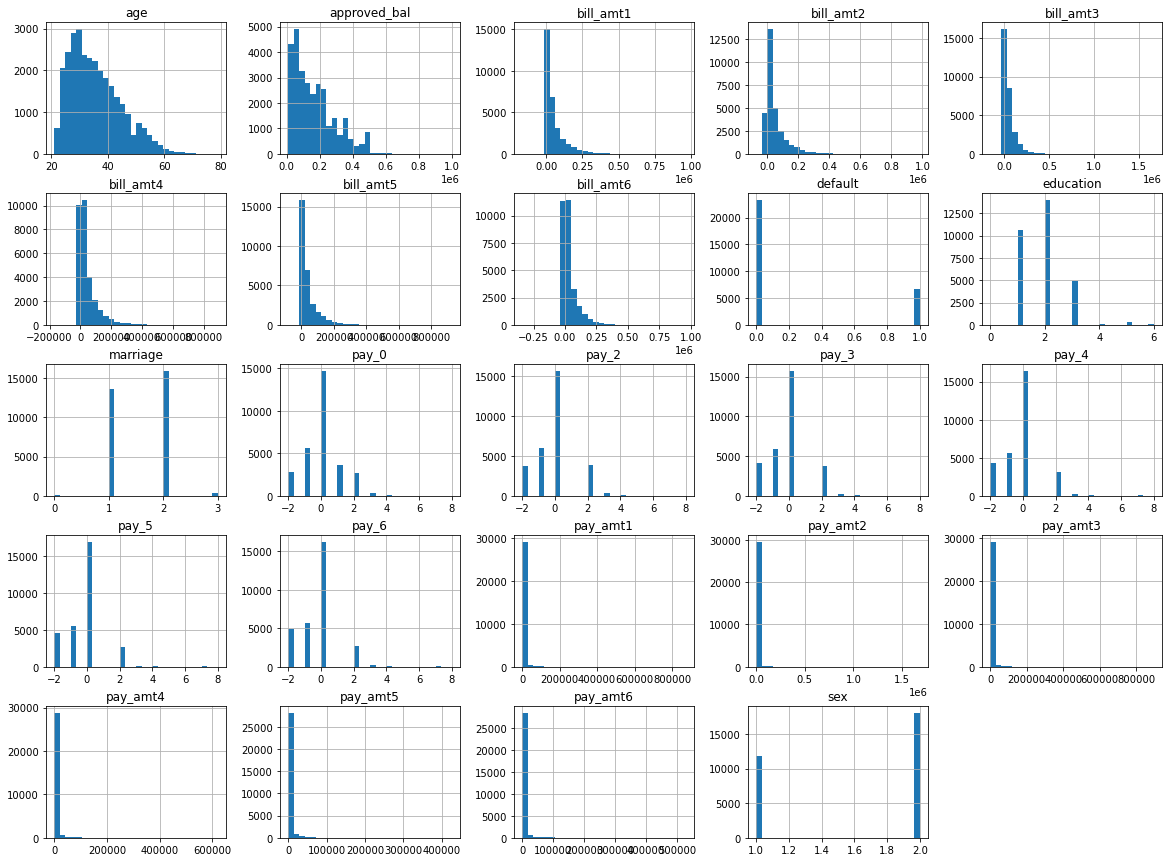

In [8]:
df.hist(bins=30 ,figsize =(20,15))
plt.show() 

Initial observations:

    -  There are 6 columns that shows the status of the client for the prior 6 months
    -  There are also another 6 columns showing the balance and payments made

In [9]:
df['pay_0'].value_counts()

 0    14737
-1     5686
 1     3688
-2     2759
 2     2667
 3      322
 4       76
 5       26
 8       19
 6       11
 7        9
Name: pay_0, dtype: int64

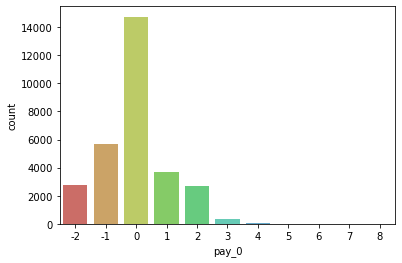

In [10]:
sns.countplot(x = 'pay_0', data=df, palette='hls')
plt.show()

In [11]:
# the average age is 35
df.age.mean()

35.4855

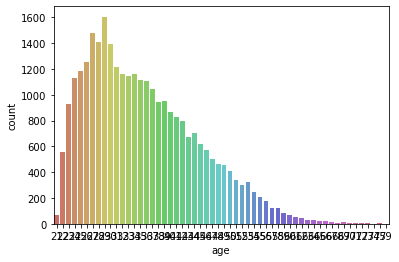

In [12]:
sns.countplot(x = 'age', data=df, palette='hls')
plt.show()

In [13]:
# The average balance approved is 167,484
df.approved_bal.mean()

167484.32266666667

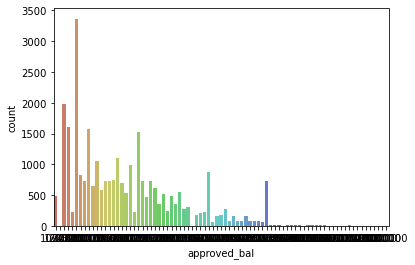

In [14]:
sns.countplot(x = 'approved_bal', data=df, palette='hls')
plt.show()

Since the aim of this project is to predict if a client will default the following month, I will only be using thier status and balance at the current month. I will drop the other 5 months. The model is attempting to predict next month defualt probability. We want to predict defualt probability based on the current status.

In [15]:
df = df.drop(['pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 
            'bill_amt2', 'bill_amt3', 'bill_amt4', 'bill_amt5', 'bill_amt6',
            'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6'], axis = 1)
df.head()

,approved_bal,sex,education,marriage,age,pay_0,bill_amt1,pay_amt1,default
ID,,,,,,,,,
1,20000,2,2,1,24,2,3913,0,1
2,120000,2,2,2,26,-1,2682,0,1
3,90000,2,2,2,34,0,29239,1518,0
4,50000,2,2,1,37,0,46990,2000,0
5,50000,1,2,1,57,-1,8617,2000,0


We will rename the columns for the current status, current balance and payments made.

In [16]:
df.rename(columns={'pay_0': 'status', 'bill_amt1': 'balance', 'pay_amt1': 'payment'},
          inplace=True)
df.head()

,approved_bal,sex,education,marriage,age,status,balance,payment,default
ID,,,,,,,,,
1,20000,2,2,1,24,2,3913,0,1
2,120000,2,2,2,26,-1,2682,0,1
3,90000,2,2,2,34,0,29239,1518,0
4,50000,2,2,1,37,0,46990,2000,0
5,50000,1,2,1,57,-1,8617,2000,0


In [17]:
# print value counts for the catagorical cols only
for col in df.columns[[1, 2, 3, 5, 6, 7]]:
    print(col)
    print(df[col].value_counts())

sex
2    18112
1    11888
Name: sex, dtype: int64
education
2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: education, dtype: int64
marriage
2    15964
1    13659
3      323
0       54
Name: marriage, dtype: int64
status
 0    14737
-1     5686
 1     3688
-2     2759
 2     2667
 3      322
 4       76
 5       26
 8       19
 6       11
 7        9
Name: status, dtype: int64
balance
0        2008
390       244
780        76
326        72
316        63
         ... 
12466       1
98874       1
2619        1
14909       1
44984       1
Name: balance, Length: 22723, dtype: int64
payment
0        5249
2000     1363
3000      891
5000      698
1500      507
         ... 
24125       1
20031       1
9019        1
11066       1
10850       1
Name: payment, Length: 7943, dtype: int64


## Exploring status

- After evaluating the value counts, we have some inconsistent data. For status we have -1, -2 labels which could mean they have no current balance. 
- Since those values are closly related to 0 meaning they are current, we will replace -1 and -2 with 0. 
- The fact that they have no balance is irrelevant for our analysis.

In [18]:
# replace -1 and -2 with 0
df["status"] = df["status"].replace([-1, -2], 0)
df["status"].value_counts(dropna=False)

0    23182
1     3688
2     2667
3      322
4       76
5       26
8       19
6       11
7        9
Name: status, dtype: int64

## Exploring education

In [19]:
df["education"].value_counts(dropna=False)

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: education, dtype: int64

The labels given for education is as follow:

- 1 = graduate, 2 = undergrad, 3 = Highschool, 4 = others, 5, 6 and 0 are uknown or missing values.
- The uknown values account for about 400 instances. 
- Since we can't predict what those labels could be, we will remove those rows 

In [20]:
# Remove rows containing 0, 4, 5, 6 for education 

df.drop(((df[df['education'] > 3].index) | (df[df['education'] == 0].index)), 
        inplace = True) 


In [21]:
print(df.shape)
df["education"].value_counts(dropna=False)

(29532, 9)


2    14030
1    10585
3     4917
Name: education, dtype: int64

After cleaning the education feature, we now have lables 1, 2, 3 for graduate, undergrad and high school. 

Next lets work on the marriage feature. 

- Values given should be 1 = married, 2 = single, 3 = others 
- We have about 54 rows with 0 label and we can convert those values to 3 

In [22]:
df["marriage"].value_counts()

2    15738
1    13425
3      315
0       54
Name: marriage, dtype: int64

In [23]:
df["marriage"] = df["marriage"].replace(0, 3)
df["marriage"].value_counts()

2    15738
1    13425
3      369
Name: marriage, dtype: int64

## Exploring balance, status and payment features

In [24]:
(df[(df.balance <= 0) & (df.default == 1) & (df.status == 0)])

,approved_bal,sex,education,marriage,age,status,balance,payment,default
ID,,,,,,,,,
46,210000,1,1,2,29,0,0,0,1
275,360000,2,2,2,28,0,0,0,1
600,300000,2,2,1,36,0,-475,10000,1
1335,300000,2,3,2,29,0,-140,28232,1
1664,500000,2,1,2,36,0,-312,0,1
...,...,...,...,...,...,...,...,...,...
29164,360000,2,3,1,73,0,0,0,1
29180,500000,2,2,1,73,0,0,2826,1
29729,160000,1,1,1,46,0,0,0,1


After exploring more initial finding are:

- We have 181 columns with balance showing negative or 0, status is 0 (not behind on payments) and default 1. 
- we will drop those rows since they are inconsistent

In [25]:
df.drop(df[(df.balance <= 0) & (df.default == 1) & (df.status == 0)].index, inplace=True)

We also have 360 rows that have instances making a payment, status is not zero suggesting they are behind but the balance is 0. 

We will drop those values as well. 

In [26]:
df[(df.status != 0) & (df.balance == 0) & (df.payment != 0)]

,approved_bal,sex,education,marriage,age,status,balance,payment,default
ID,,,,,,,,,
39,50000,1,1,2,25,1,0,780,1
189,130000,2,2,1,34,1,0,5396,0
308,300000,2,2,1,27,1,0,5215,0
318,260000,2,3,1,53,1,0,165,0
387,80000,2,1,2,29,1,0,80000,0
...,...,...,...,...,...,...,...,...,...
29245,140000,1,2,2,25,1,0,850,0
29451,200000,1,1,2,30,1,0,1870,0
29471,240000,1,2,2,31,1,0,780,0


In [27]:
df.drop(df[(df.status != 0) & (df.balance == 0) & (df.payment != 0)].index, 
        inplace = True) 

## Remove Duplicates 

In [28]:
duplicate_rows = df[df.duplicated()]
duplicate_rows.shape

(122, 9)

We have 124 rows of duplicated data. We don't need duplicates data so we will remove them.  

In [29]:
# drop duplicates 
df = df.drop_duplicates()

## Feature engineering 

Adding new feature with the utilization rate could be good adition to the model.  

In [30]:
df["utilization"] = (df["balance"] / df["approved_bal"])
df.sample(3)

,approved_bal,sex,education,marriage,age,status,balance,payment,default,utilization
ID,,,,,,,,,,
25679,30000,2,3,1,43,2,30346,1702,1,1.011533
22037,250000,2,1,2,28,0,45687,5000,0,0.182748
4416,170000,1,2,1,48,0,390,390,0,0.002294


In [31]:
# reindex columns to move the label to the last column
column_names = ['approved_bal', 'sex', 'education', 'marriage', 'age', 'status',
       'balance', 'payment', 'utilization', 'default']
df = df.reindex(columns=column_names)
df.head(5)

,approved_bal,sex,education,marriage,age,status,balance,payment,utilization,default
ID,,,,,,,,,,
1,20000,2,2,1,24,2,3913,0,0.195650,1
2,120000,2,2,2,26,0,2682,0,0.022350,1
3,90000,2,2,2,34,0,29239,1518,0.324878,0
4,50000,2,2,1,37,0,46990,2000,0.939800,0
5,50000,1,2,1,57,0,8617,2000,0.172340,0


In [32]:
print(df.shape)
print(df.dtypes)
print(df.isnull().sum()) 
print(df.nunique())

(28867, 10)
approved_bal      int64
sex               int64
education         int64
marriage          int64
age               int64
status            int64
balance           int64
payment           int64
utilization     float64
default           int64
dtype: object
approved_bal    0
sex             0
education       0
marriage        0
age             0
status          0
balance         0
payment         0
utilization     0
default         0
dtype: int64
approved_bal       81
sex                 2
education           3
marriage            3
age                56
status              9
balance         22392
payment          7749
utilization     25168
default             2
dtype: int64


In [33]:
print(df.iloc[0])
print(df.describe(include='all'))
print(df.sample(5))

approved_bal    20000.00000
sex                 2.00000
education           2.00000
marriage            1.00000
age                24.00000
status              2.00000
balance          3913.00000
payment             0.00000
utilization         0.19565
default             1.00000
Name: 1, dtype: float64
         approved_bal           sex     education      marriage           age  \
count    28867.000000  28867.000000  28867.000000  28867.000000  28867.000000   
mean    166324.650293      1.601309      1.812554      1.558077     35.462431   
std     129912.702450      0.489637      0.697481      0.521398      9.217752   
min      10000.000000      1.000000      1.000000      1.000000     21.000000   
25%      50000.000000      1.000000      1.000000      1.000000     28.000000   
50%     140000.000000      2.000000      2.000000      2.000000     34.000000   
75%     240000.000000      2.000000      2.000000      2.000000     41.000000   
max    1000000.000000      2.000000      3.00000

After cleaning the data we are left with 28867 examples and 9 features. We can also see that we have no null values. We will save the cleaned dataframe and we will move on to feature encoding and scaling. 

In [34]:
df.to_csv('credit_default_cleaned.csv',index=False)

## Visualizations

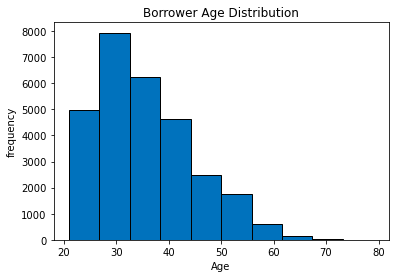

In [35]:
fig, ax = plt.subplots()
df["age"].hist(color = '#0072BD', edgecolor = 'black', 
             grid = False)
ax.set_title("Borrower Age Distribution", fontsize = 12)
ax.set_xlabel("Age")
ax.set_ylabel("frequency")
plt.show()

No handles with labels found to put in legend.


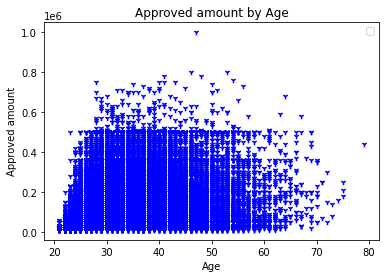

In [36]:
plt.scatter(df['age'], df['approved_bal'], color="blue",
            marker="1", s=30)
plt.xlabel('Age')
plt.ylabel('Approved amount')

plt.title('Approved amount by Age')
plt.legend()

plt.show()

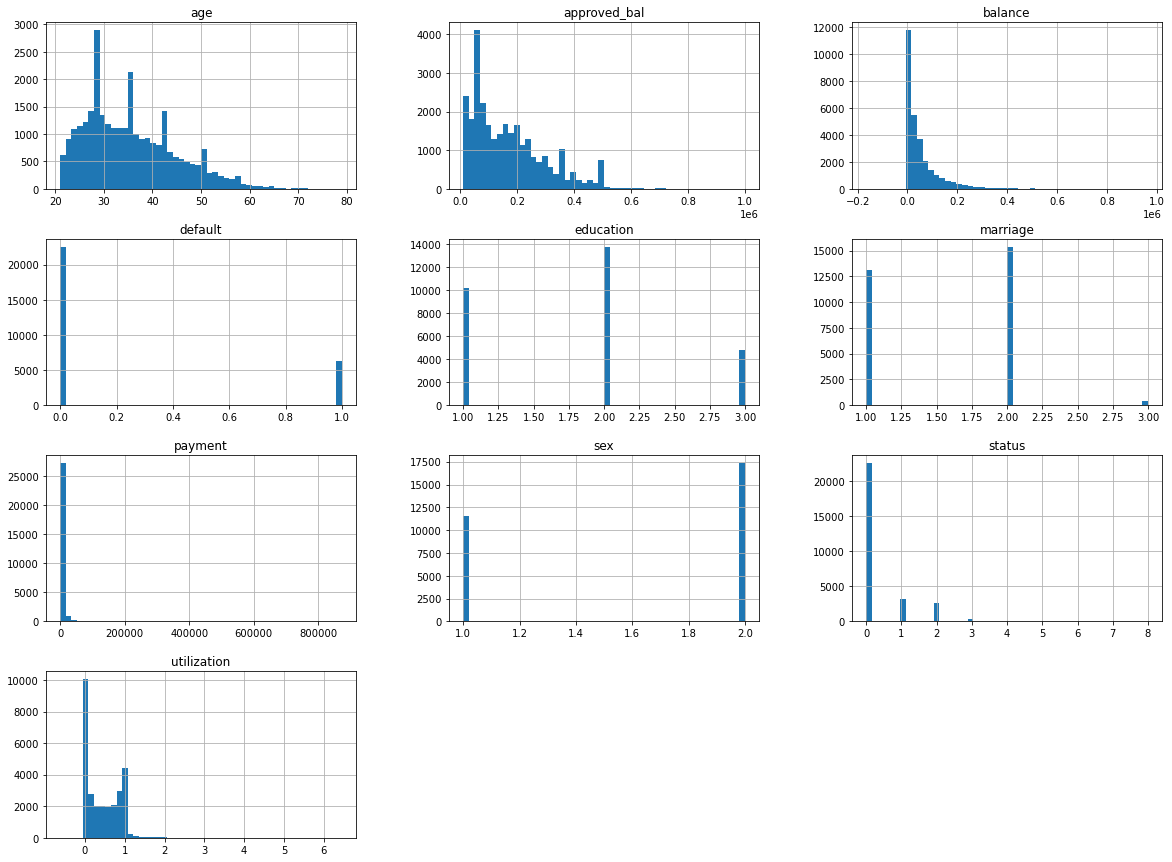

In [37]:
df.hist(bins=50 ,figsize =(20,15))
plt.show() 

## Encode Nominal and Ordinal features 

- we have the sex and marriage features as nominal 
- we have education and status as ordinal features 

- Use OneHotEncoder to encode the nominal features
- Use ordinal encoder to encode the ordinal features 

- Use Discretization to bucket the age groups with equal width uniformly 

### We will encode the Ordinal features first 

In [38]:
encoder = OrdinalEncoder()

df.education = encoder.fit_transform(df.education.values.reshape(-1, 1))
df.status = encoder.fit_transform(df.status.values.reshape(-1, 1))

In [39]:
print(df.education.unique())
print(df.status.unique())

[1. 0. 2.]
[2. 0. 1. 3. 4. 8. 7. 5. 6.]


### Bucket age groups into bins with equal width uniformly

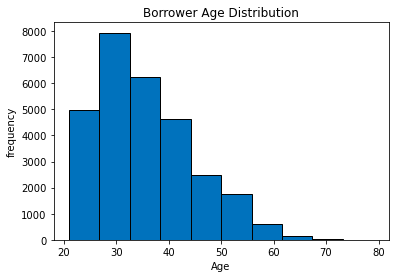

In [40]:
fig, ax = plt.subplots()
df["age"].hist(color = '#0072BD', edgecolor = 'black', 
             grid = False)
ax.set_title("Borrower Age Distribution", fontsize = 12)
ax.set_xlabel("Age")
ax.set_ylabel("frequency")
plt.show()

In [41]:
discret = KBinsDiscretizer(n_bins=6, encode='ordinal', 
                        strategy='uniform')

df.age = discret.fit_transform(df.age.values.reshape(-1, 1))

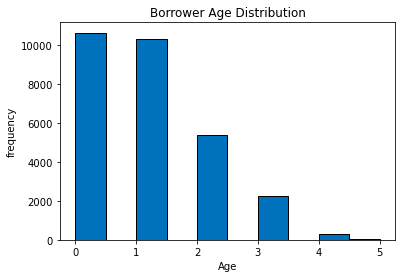

In [42]:
fig, ax = plt.subplots()
df["age"].hist(color = '#0072BD', edgecolor = 'black', 
             grid = False)
ax.set_title("Borrower Age Distribution", fontsize = 12)
ax.set_xlabel("Age")
ax.set_ylabel("frequency")
plt.show()

## Feature Scale 

In [43]:
df.dtypes

approved_bal      int64
sex               int64
education       float64
marriage          int64
age             float64
status          float64
balance           int64
payment           int64
utilization     float64
default           int64
dtype: object

In [44]:
scaler = MinMaxScaler()
# transform data
scaled = scaler.fit_transform(df)
print(scaled[:5])

[[0.01010101 1.         0.5        0.         0.         0.25
  0.14998173 0.         0.11526783 1.        ]
 [0.11111111 1.         0.5        0.5        0.         0.
  0.14889243 0.         0.09077379 1.        ]
 [0.08080808 1.         0.5        0.5        0.2        0.
  0.17239231 0.00173773 0.13353274 0.        ]
 [0.04040404 1.         0.5        0.         0.2        0.
  0.1880999  0.0022895  0.22044518 0.        ]
 [0.04040404 0.         0.5        0.         0.6        0.
  0.15414422 0.0022895  0.11197322 0.        ]]


### Split data for training set and test set

In [45]:
# split for train set and test set 
X = df.iloc[:, 0:-1]
y = df.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, 
                                                    random_state=1, stratify = y)

In [46]:
# stratify parameter is keeping the same proportion of labels as the dataset in test and train 
# 22% for default and 78% not default

print(np.bincount(y))
print(np.bincount(y_train))
print(np.bincount(y_test))

[22558  6309]
[15790  4416]
[6768 1893]


In [47]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(20206, 9) (8661, 9)
(20206,) (8661,)


### We will encode the Nominal features 

Since the values are already in integers, we just need to use OneHotEncoder to add the additional columns and we do not need to convert values to integers. 

In [48]:
# use column tranformer to transform multiple columns at once 
onehot = OneHotEncoder(dtype=np.int, sparse=True)

# index 1 and 3 for the sex and marriage features 
col_transform = ColumnTransformer([('encoder', OneHotEncoder(), [1, 3])],
                                  remainder='passthrough')

In [49]:
X_train = np.array(col_transform.fit_transform(X_train), dtype = np.int)
X_test = np.array(col_transform.transform(X_test), dtype = np.int)

# 4. Model Comparison

## Logistic Regression Model

In [50]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [51]:
lr.fit(X_train, y_train)

LogisticRegression()

In [52]:
predictions = lr.predict(X_test)

In [53]:
# Use score method to get accuracy of model
score = lr.score(X_test, y_test)
print(score)

0.7814340145479737


In [54]:
from sklearn import metrics

In [55]:
confusion = metrics.confusion_matrix(y_test, predictions)
print(confusion)

[[6768    0]
 [1893    0]]


Text(0.5, 1.0, 'Accuracy Score: 0.7814340145479737')

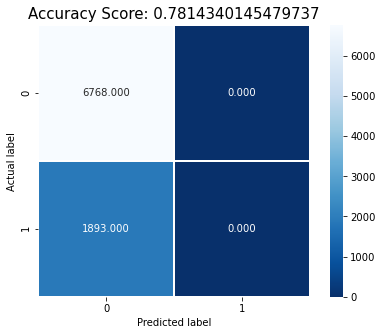

In [58]:
plt.figure(figsize=(7,5))
sns.heatmap(confusion, annot=True, fmt=".3f", linewidths=.5, 
            square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15)

In [59]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.78      1.00      0.88      6768
           1       0.00      0.00      0.00      1893

    accuracy                           0.78      8661
   macro avg       0.39      0.50      0.44      8661
weighted avg       0.61      0.78      0.69      8661



/Users/kb/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Decision Tree 

In [60]:
from sklearn import tree
model = tree.DecisionTreeClassifier(max_depth=3)

In [61]:
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [62]:
y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.828426278720702

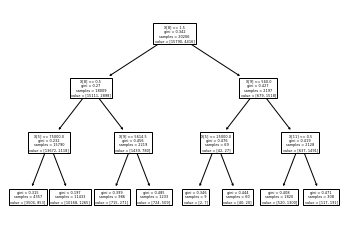

In [63]:
tree.plot_tree(model)
plt.show()

## Random Forest

In [64]:
from sklearn.ensemble import RandomForestClassifier

# Create the model with 30 trees
model = RandomForestClassifier(n_estimators=50, 
                               bootstrap = True,
                               max_features = 'sqrt')
# Fit on training data
model.fit(X_train, y_train)

RandomForestClassifier(max_features='sqrt', n_estimators=50)

In [65]:
# Actual class predictions
y_pred = model.predict(X_test)


# Probabilities for each class
probs = model.predict_proba(X_test)[:, 1]

In [66]:
accuracy_score(y_test, y_pred)

0.8034868952776816

In [67]:
confusion = metrics.confusion_matrix(y_test, y_pred)
print(confusion)

[[6292  476]
 [1226  667]]


Text(0.5, 1.0, 'Accuracy Score: 0.7814340145479737')

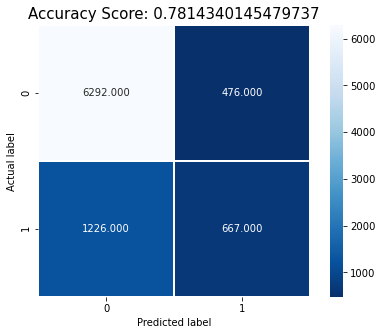

In [68]:
plt.figure(figsize=(7,5))
sns.heatmap(confusion, annot=True, fmt=".3f", linewidths=.5, 
            square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15)

# 5. Experiment summary

Data collection was done through the website of UCI Machine Learning Repository. The dataset was downloaded as excel file and read using the pandas excel reader. These dataset had lots of irrelevant features I was able to drop. All though this dataset did not have missing values, it did have many values that was inconsistent. After doing some analysis by comparing important features against each other using comparasion operators, I was able to filter out the inconsistent data. 

I used KBinsDiscretizer to put the age groups into bins and encoded the nominal and ordinal features. I used the min max scaler to scale some features as well before I started with my model comparison. 

I compared the performance of Logisitc Regression, Decision Tree and Random forest models. The Descion Tree model performed better based on accuracy using only depth of 3. Allthough they were all around 80% accuarte, I found that Decision tree performed better than the Random forest as well. I learned that hyperparameter tuning does help with accuracy. With the default depth, My accuracy was only 72% however after changing the depth to 3-5, the accuracy went up to 82% for all. 